# NNIA: Tutorial 6 - 19.12.2017

---

In [1]:
# Set notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Quiz 2

- [Model capacity](https://cbmm.mit.edu/sites/default/files/publications/CBMM-Memo-067.pdf)
- Loss functions
- Hidden units
- Regularization
- Backprop

$1)$ Model capacity

![Model Capacity](./model-capacity.png)

Source: [Deep Learning - Goodfellow et al.](http://www.deeplearningbook.org/)

$2)$ Loss functions

$$MSE = \mathcal{J}(\theta) = \sum_{i=0}^m (y_i - \hat{y}_i)^2 = \sum_{i=0}^m (y_i - f(x_i; \theta))^2$$ 

$$CE = \mathcal{J}(\theta) = - \mathbb{E}_{\mathbf{x}, \mathbf{y} \sim \hat{p}_{data}} [log~p_{model} (\mathbf{y} \mid \mathbf{x})]$$

Depending on the actual model the specific form of $log ~
 p_{model} (\mathbf{y} \mid \mathbf{x})$ changes.

**Different viewpoint**:
$$ \mathcal{H}(p, q) = - \sum_{x} p(x) ~ log ~ q(x) $$

### I will try to prepare an additional tutorial on this topic before the exam. Because this is really important to understand. Please send me an email in case you are interested.

$3)$ Hidden units

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

$$relu(x) = \max\{0, x\} =
\begin{cases}
0,  & \text{if $x \leq 0$} \\
x, & \text{else}
\end{cases}$$

In [10]:
import numpy as np

xs = np.linspace(-5, 5, 1000)

def relu(x):
    return np.maximum(0, x)

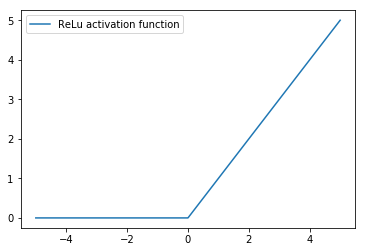

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(xs, relu(xs), label='ReLu activation function')
plt.legend();

In [18]:
import tensorflow as tf

isess = tf.InteractiveSession()
x = tf.constant(0.0)
r = tf.nn.relu(x)
print(r.eval())
isess.close()

0.0


$4)$ Regularization

$$\mathcal{R}_1 = \lambda * \lVert w \rVert_2^2$$

$$\mathcal{R}_2 = \lambda * \lVert w \rVert_1$$

$$\nabla_w \mathcal{R}_1 = \lambda 2w$$

$$\nabla_w \mathcal{R}_2 = \lambda * sign(w)$$

$5)$ Backprop

![Backprop](./backprop.png)

---

## Assignment-6

#### 1. Regularization methods in ML

---

#### 2. Impact of different norms

![Unit spheres](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Vector-p-Norms_qtl1.svg/820px-Vector-p-Norms_qtl1.svg.png)

*Source: https://de.wikipedia.org/wiki/Datei:Vector-p-Norms_qtl1.svg*

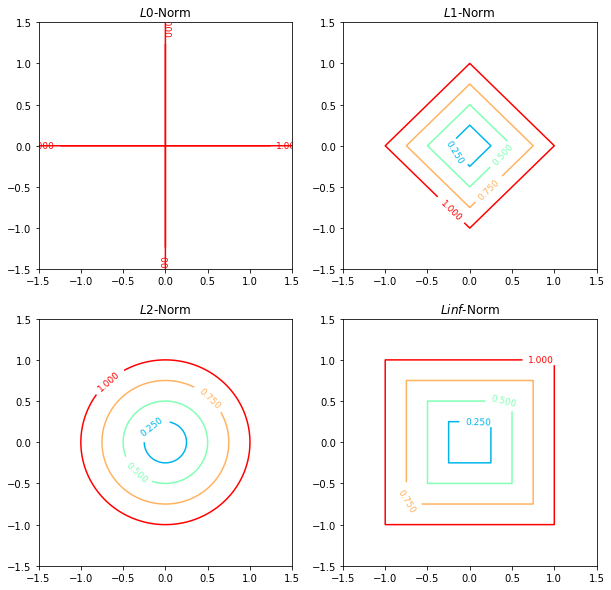

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
nsamples = 1001
interval = np.linspace(-1.5, 1.5, num=nsamples)
x, y = np.meshgrid(interval, interval)

def l0_norm(x1, x2):
    return np.count_nonzero([x1, x2])

def l1_norm(x1, x2):
    return np.abs(x1) + np.abs(x2)

def l2_norm(x1, x2):
    return np.sqrt(np.square(x1) + np.square(x2))

def inf_norm(x1, x2):
    z = np.array([x1, x2])
    return np.max(np.abs(z))

fig, axes = plt.subplots(nrows= 2, ncols=2, figsize=(10,10))

# L0 norm
l0_norm = np.vectorize(l0_norm)
z = l0_norm(x, y)
cs = axes[0, 0].contour(x, y, z, levels=[0, 0.25, 0.5, 0.75, 1], cmap='rainbow')
axes[0, 0].clabel(cs, inline=1, fontsize=9)
axes[0, 0].set_title('$L0$-Norm')

# L1 norm
z = l1_norm(x, y)
cs = axes[0, 1].contour(x, y, z, levels=[0, 0.25, 0.5, 0.75, 1], cmap='rainbow')
axes[0, 1].clabel(cs, inline=1, fontsize=9)
axes[0, 1].set_title('$L1$-Norm')

# L2 norm
z = l2_norm(x, y)
cs = axes[1, 0].contour(x, y, z, levels=[0, 0.25, 0.5, 0.75, 1], cmap='rainbow')
axes[1, 0].clabel(cs, inline=1, fontsize=9)
axes[1, 0].set_title('$L2$-Norm')

# Linf norm
inf_norm = np.vectorize(inf_norm)
z = inf_norm(x, y)
cs = axes[1, 1].contour(x, y, z, levels=[0, 0.25, 0.5, 0.75, 1], cmap='rainbow')
axes[1, 1].clabel(cs, inline=1, fontsize=9)
axes[1, 1].set_title('$Linf$-Norm');

In [1]:
from IPython.display import IFrame
IFrame("http://www-bcf.usc.edu/~gareth/ISL/Chapter6/6.7.pdf", width=1200, height=600)

*Source: http://www-bcf.usc.edu/~gareth/ISL/data.html*

In case you are intrested in more details please check [Deep Learning Book - Chapter 7.1.1](http://www.deeplearningbook.org/contents/regularization.html)

---

#### 3. Backprop

![Detailed NN](https://i.stack.imgur.com/76Kuo.png)

*Source: https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications/154880#154880*

[Verify at home!](http://neuralnetworksanddeeplearning.com/chap2.html)

---

#### 4. Feed-forward neural net in python

[Example](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py)

I encourage you to do practice this during the christmas break. In case you have any questions regarding the implementation just send me an email.

---